In [1]:
#https://www.tensorflow.org/guide/data
#https://www.tensorflow.org/tutorials/load_data/images#using_tfdata_for_finer_control

## Se cargan los paquetes

In [2]:
import numpy as np
import os
import tensorflow as tf
import json
import matplotlib.pyplot as plt

## Breve preprocesamiento

Se identifica si existe la misma cantida de archivos *.json* y archivos *.png*

In [3]:
count_json = 0
count_img = 0
for i in os.listdir('data/train/'):
    _,j = os.path.splitext(i)
    if 'json' in i:
        count_json += 1
    else:
        count_img += 1
        
count_json,count_img

(2658, 2658)

In [4]:
file_names = list(set('data/train/'+os.path.splitext(file)[0] for file in os.listdir('data/train/')))

In [5]:
no_image_list = []
for file_name in file_names:
    file_name_with_extension = file_name.split('/')[-1] + '.png'
    if file_name_with_extension not in os.listdir('data/train/'):
        no_image_list.append(file_name.split('/')[-1])
        print('NO Existe',file_name)
        
len(no_image_list)

0

## Se construye el dataset

In [6]:
def process_path(image_path,label):
    # Load the raw data from the file as a string
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    return img, label

In [7]:
def configure_for_performance(ds,batch_size):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    
    return ds

In [8]:
images = []
labels = []

for file_name in file_names:
    name = file_name.split('/')[-1].split('/')[-1]
    if name not in no_image_list:
        with open(file_name+'.json') as f:
            label_json = json.load(f)
        label = label_json['labels']

        images.append(file_name+'.png')
        labels.append(label[0])

In [9]:
ds_train = tf.data.Dataset.from_tensor_slices((images,labels))
ds_train = ds_train.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = configure_for_performance(ds_train,batch_size=32)

## Se muestran las imágenes

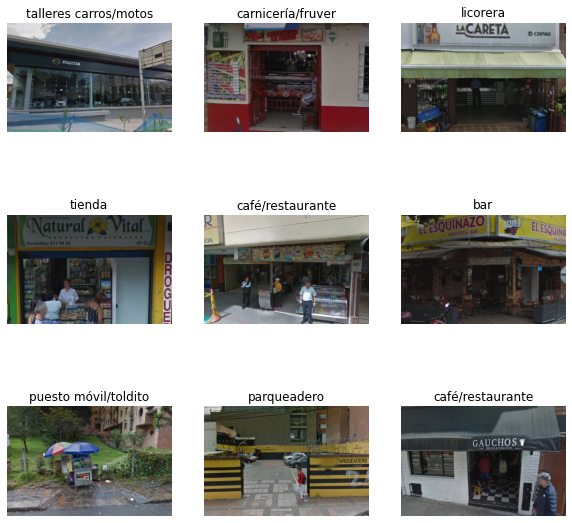

In [10]:
image_batch, label_batch = next(iter(ds_train))

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    plt.title(label_batch[i].numpy().decode('UTF-8'))
    plt.axis("off")